In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/workspaces/SuperApp/notebook/data/cleaned_match_data.csv")
print("Dataset shape:", df.shape)
display(df.head())

Dataset shape: (17863, 34)


,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score,runs,...,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match,toss_winner_won
0,1,1,1,0.1,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0,0,...,field,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,0.0,5.0,Rashid Khan,1
1,1,2,1,0.2,1lb,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, 1 leg bye,",1,1,...,field,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,0.0,5.0,Rashid Khan,1
2,1,3,1,0.3,0,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, no run,",0,0,...,field,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,0.0,5.0,Rashid Khan,1
3,1,4,1,0.4,1,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, 1 run,",1,1,...,field,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,0.0,5.0,Rashid Khan,1
4,1,5,1,0.5,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0,0,...,field,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,0.0,5.0,Rashid Khan,1


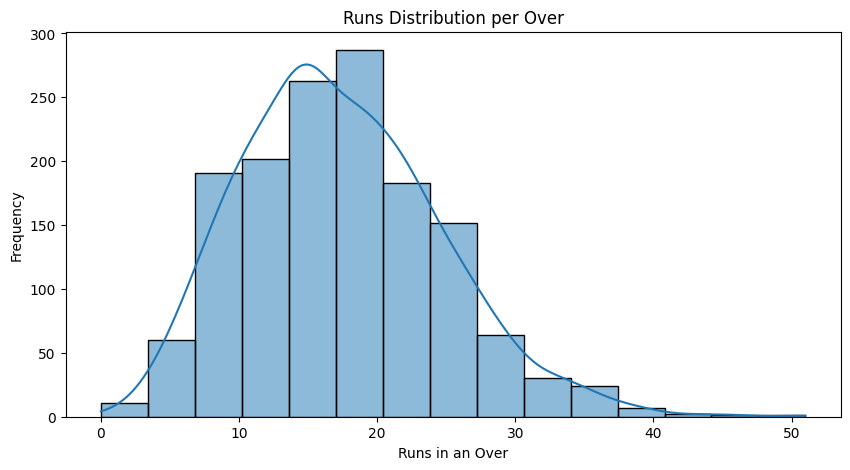

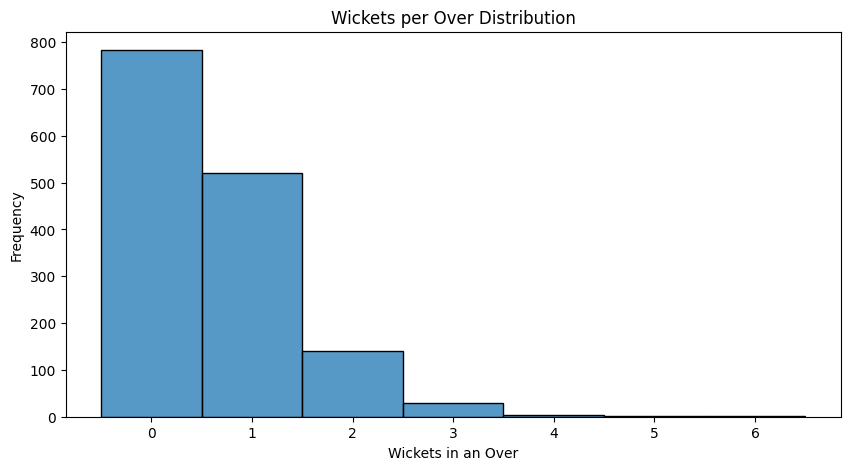

In [6]:
runs_per_over = df.groupby(["match_no","over_number"])["runs"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.histplot(runs_per_over["runs"], bins=15, kde=True)
plt.title("Runs Distribution per Over")
plt.xlabel("Runs in an Over")
plt.ylabel("Frequency")
plt.show()

wickets_per_over = df.groupby(["match_no","over_number"])["wicket"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.histplot(wickets_per_over["wicket"], bins=10, discrete=True)
plt.title("Wickets per Over Distribution")
plt.xlabel("Wickets in an Over")
plt.ylabel("Frequency")
plt.show()

Top 10 Run Scorers:


,batter,runs_scored,balls_faced,dismissals,strike_rate
149,Shubman Gill,916,580,16,157.931034
45,Faf du Plessis,735,475,13,154.736842
42,Devon Conway,684,481,14,142.203742
167,Virat Kohli,657,469,12,140.085288
175,Yashasvi Jaiswal,637,384,11,165.885417
136,Ruturaj Gaikwad,608,408,13,149.019608
152,Suryakumar Yadav,604,334,14,180.838323
36,David Warner,526,401,12,131.172070
129,Rinku Singh,495,331,8,149.546828
57,Ishan Kishan,463,318,15,145.597484


/tmp/ipykernel_2286/328806734.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_batters, x="runs_scored", y="batter", palette="viridis")


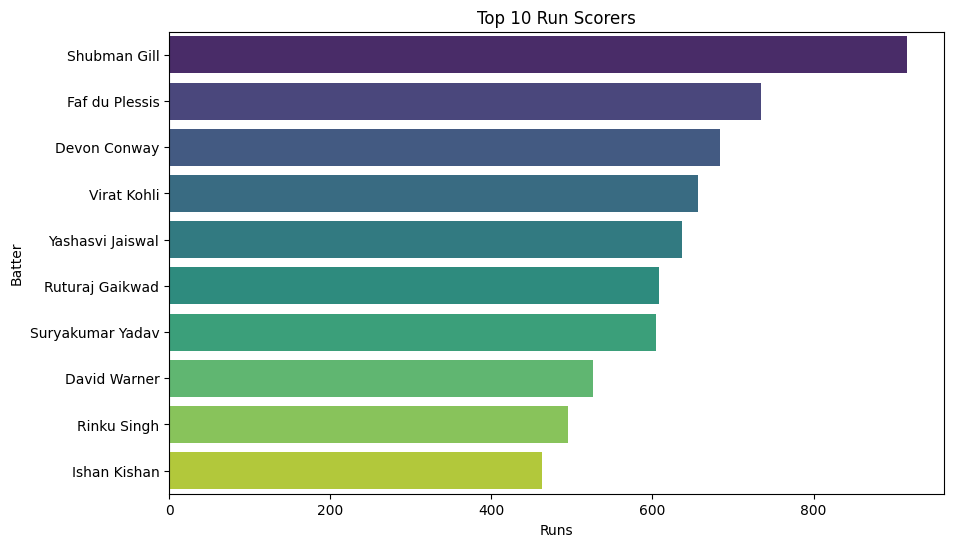

Top 10 Wicket Takers:


,bowler,runs_conceded,balls_bowled,wickets_taken,economy
82,Mohit Sharma,359,268,31,8.037313
79,Mohammed Shami,532,403,28,7.920596
100,Rashid Khan,557,407,28,8.211302
122,Tushar Deshpande,578,368,24,9.423913
94,Piyush Chawla,497,371,23,8.037736
71,Matheesha Pathirana,385,310,23,7.451613
135,Yuzvendra Chahal,434,326,22,7.987730
80,Mohammed Siraj,395,329,20,7.203647
103,Ravindra Jadeja,432,348,20,7.448276
126,Varun Chakravarthy,445,323,20,8.266254


/tmp/ipykernel_2286/328806734.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bowlers, x="wickets_taken", y="bowler", palette="magma")


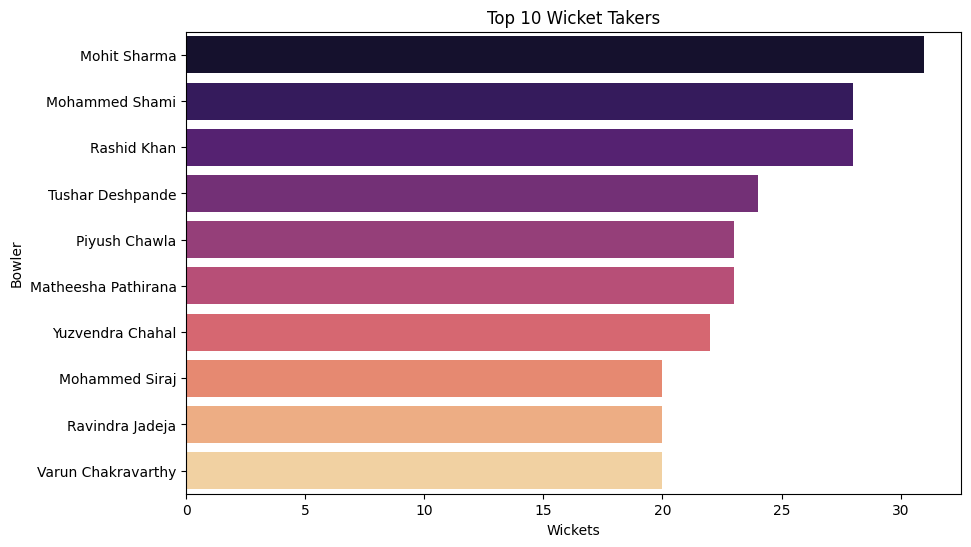

In [7]:
batting_stats = df.groupby("batter").agg(
    runs_scored=("runs","sum"),
    balls_faced=("ballnumber","count"),
    dismissals=("wicket","sum")
).reset_index()
batting_stats["strike_rate"] = (batting_stats["runs_scored"]/batting_stats["balls_faced"])*100

top_batters = batting_stats.sort_values("runs_scored", ascending=False).head(10)
print("Top 10 Run Scorers:")
display(top_batters)

plt.figure(figsize=(10,6))
sns.barplot(data=top_batters, x="runs_scored", y="batter", palette="viridis")
plt.title("Top 10 Run Scorers")
plt.xlabel("Runs")
plt.ylabel("Batter")
plt.show()

# Bowling stats
bowling_stats = df.groupby("bowler").agg(
    runs_conceded=("runs","sum"),
    balls_bowled=("ballnumber","count"),
    wickets_taken=("wicket","sum")
).reset_index()
bowling_stats["economy"] = (bowling_stats["runs_conceded"] / (bowling_stats["balls_bowled"]/6))

top_bowlers = bowling_stats.sort_values("wickets_taken", ascending=False).head(10)
print("Top 10 Wicket Takers:")
display(top_bowlers)

plt.figure(figsize=(10,6))
sns.barplot(data=top_bowlers, x="wickets_taken", y="bowler", palette="magma")
plt.title("Top 10 Wicket Takers")
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.show()

/tmp/ipykernel_2286/1797182451.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=venue_scores.head(10), x="cumulative_runs", y="venue", palette="coolwarm")


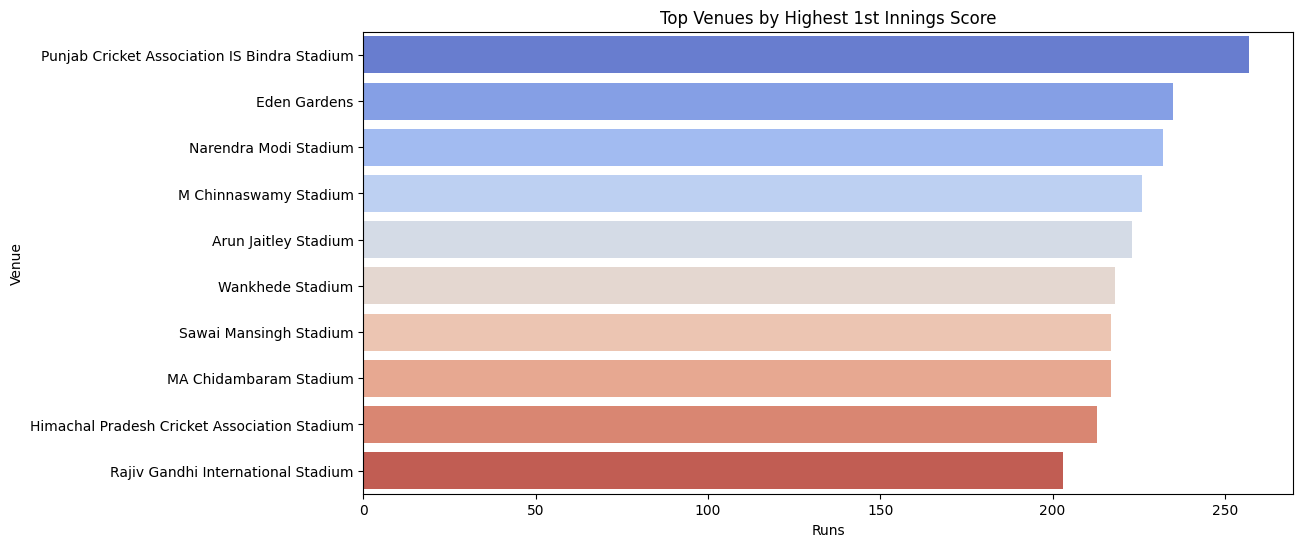

/tmp/ipykernel_2286/1797182451.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=venue_summary.sort_values("runs_per_wicket", ascending=False).head(10),


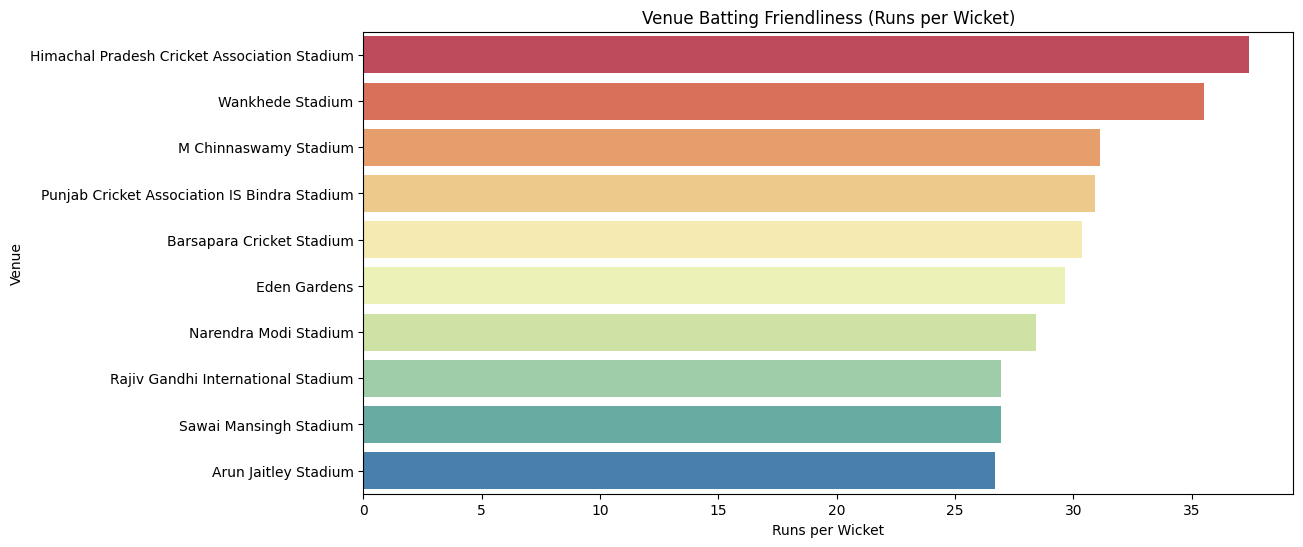

In [8]:
venue_scores = df.groupby("venue")["cumulative_runs"].max().reset_index().sort_values("cumulative_runs", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=venue_scores.head(10), x="cumulative_runs", y="venue", palette="coolwarm")
plt.title("Top Venues by Highest 1st Innings Score")
plt.xlabel("Runs")
plt.ylabel("Venue")
plt.show()

# Batting vs Bowling Advantage by Venue
venue_wickets = df.groupby("venue")["wicket"].sum().reset_index()
venue_runs = df.groupby("venue")["runs"].sum().reset_index()
venue_summary = pd.merge(venue_runs, venue_wickets, on="venue")
venue_summary["runs_per_wicket"] = venue_summary["runs"]/venue_summary["wicket"]

plt.figure(figsize=(12,6))
sns.barplot(data=venue_summary.sort_values("runs_per_wicket", ascending=False).head(10), 
            x="runs_per_wicket", y="venue", palette="Spectral")
plt.title("Venue Batting Friendliness (Runs per Wicket)")
plt.xlabel("Runs per Wicket")
plt.ylabel("Venue")
plt.show()


Top 10 Rivalries (by dismissals):


,batter,bowler,runs_scored,balls_faced,dismissals,strike_rate
3236,inis,Marcus S,101,69,5,146.376812
3238,n Sundar,Washing,146,106,3,137.735849
3149,Wriddhiman Saha,Deepak Chahar,40,30,2,133.333333
3239,ne,Liam Livings,94,42,2,223.809524


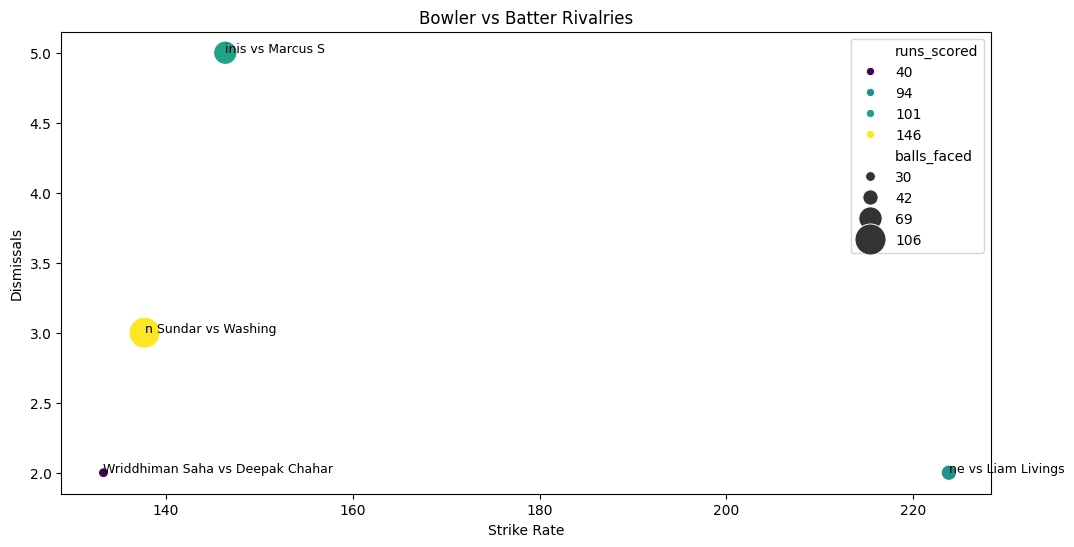

In [9]:
rivalry = df.groupby(["batter","bowler"]).agg(
    runs_scored=("runs","sum"),
    balls_faced=("ballnumber","count"),
    dismissals=("wicket","sum")
).reset_index()
rivalry["strike_rate"] = (rivalry["runs_scored"]/rivalry["balls_faced"])*100

# Get top rivalries (min 30 balls faced)
top_rivalries = rivalry[rivalry["balls_faced"] >= 30].sort_values("dismissals", ascending=False).head(10)
print("Top 10 Rivalries (by dismissals):")
display(top_rivalries)

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=top_rivalries,
    x="strike_rate",
    y="dismissals",
    size="balls_faced",
    hue="runs_scored",
    sizes=(50,500),
    palette="viridis"
)
for i, row in top_rivalries.iterrows():
    plt.text(row["strike_rate"], row["dismissals"], f"{row['batter']} vs {row['bowler']}", fontsize=9)
plt.title("Bowler vs Batter Rivalries")
plt.xlabel("Strike Rate")
plt.ylabel("Dismissals")
plt.show()